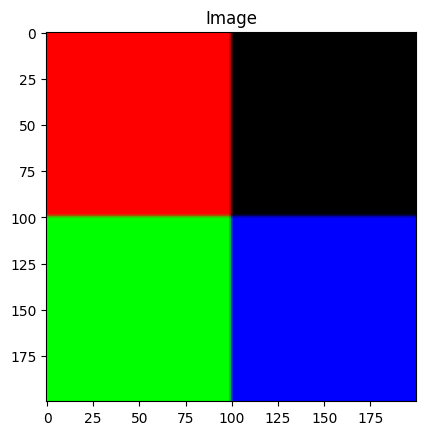

-1

In [34]:
#task 1
import cv2 as cv
from cv2 import waitKey
import numpy
import matplotlib.pyplot as plt
#height and width of each image
h = 50
w = 50
#image generation
img1 = numpy.zeros((h,w,3), numpy.uint8)
img1[:,:] = (255,0,0)
img2 = numpy.zeros((h,w,3), numpy.uint8)
img2[:,:] = (0,0,0)
img3 = numpy.zeros((h,w,3), numpy.uint8)
img3[:,:] = (0,255,0)
img4 = numpy.zeros((h,w,3), numpy.uint8)
img4[:,:] = (0,0,255)
#image attaching
h1 = numpy.hstack((img1,img2))
h2 = numpy.hstack((img3,img4))
v  = numpy.vstack((h1,h2))
#image resizing
imgresized = cv.resize(v,(200,200))
#image printing
plt.title('Image')
plt.imshow(imgresized)
plt.show()
waitKey(0)

In [ ]:
#task 2
import cv2 as cv
from cv2 import waitKey
from cv2 import imshow

#button variables
r = 0
g = 0
h = 0
x = 0
s = 0
c = 0
numofPhotos = 1

#Enabling camera
cam = cv.VideoCapture(0)
cam.set(3,640)
cam.set(2,480)
cam.set(10,100)

#videowriter object
result = cv.VideoWriter('CapturedVideo.avi', cv.VideoWriter_fourcc(*'MJPG'),10,(640,480))

#Displaying camera
while True:
    iftrue, frame = cam.read()
    if s :
        result.write(frame)
    if g :
        frame = cv.cvtColor(frame ,cv.COLOR_BGR2GRAY)
    if r :
        frame = cv.rotate(frame, cv.ROTATE_90_CLOCKWISE) 
    if h :
        frame = cv.cvtColor(frame, cv.COLOR_BGR2HSV) 
    if x :
        grey = cv.cvtColor(frame ,cv.COLOR_BGR2GRAY)
        rotate = cv.rotate(frame, cv.ROTATE_90_CLOCKWISE)
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV) 
        cv.imshow("Rotated",rotate) 
        cv.imshow("Grey", grey) 
        cv.imshow("hsv",hsv) 
    
    cv.imshow("Video", frame) 
    input = cv.waitKey(1)

    if (input == ord('q')) or (input == ord('Q')) :
        if s :
            cam.release()
            result.release()
        break
    elif (input == ord('r')) or (input == ord('R')) :
        r,g,h = 1,0,0
    elif (input == ord('h')) or (input == ord('H')) :
        h,r,g, = 1,0,0
    elif (input == ord('g')) or (input == ord('G')) :
        g,r,h = 1,0,0
    elif (input == ord('x')) or (input == ord('X')) :
        x,g,r,h = 1,0,0,0
    elif (input == ord('z')) or (input == ord('Z')) :
        cv.destroyAllWindows()
        x,g,r,h = 0,0,0,0
    elif (input == ord('s')) or (input == ord('S')) :
        s = 1
    elif (input == ord('c')) or (input == ord('C')) :
        cv.imwrite(f'Image{numofPhotos}.png',frame)
        numofPhotos+=1
#code runs perfectly on task2 file, but crashes in the jupyter notebook

In [ ]:
#Task 3
 

In [31]:
#Task 4
import cv2 as cv
from cv2 import waitKey
from cv2 import EVENT_MBUTTONDOWN
import numpy as np

def mb(event,x,y,flags,params):
    global img
    global old
    global blank

    if event == cv.EVENT_LBUTTONDOWN:
        old = img.copy()
        cv.circle(img,(x,y),15,(0,255,0),-1)
    if event == cv.EVENT_RBUTTONDBLCLK:
        img = blank.copy()
        old = blank.copy()
        cv.imshow(" ", img)  
    if event == cv.EVENT_RBUTTONDOWN:
        img = old.copy()
        cv.imshow(" ", img)

blank = np.zeros((720,1080,3),np.uint8)
img = np.zeros((720,1080,3),np.uint8)
cv.putText(img, 'Press Q to quit', (25, 550),cv.FONT_HERSHEY_TRIPLEX,0.5,(255, 255, 255),1)
cv.putText(img, 'Click left mouse button to add circle', (25, 700),cv.FONT_HERSHEY_TRIPLEX,0.5,(255, 255, 255),1)
cv.putText(img, 'Click right mouse button to undo last drawn circle', (25, 650),cv.FONT_HERSHEY_TRIPLEX,0.5,(255, 255, 255),1)
cv.putText(img, 'Double click right mouse button to clear', (25, 600),cv.FONT_HERSHEY_TRIPLEX,0.5,(255, 255, 255),1)
cv.putText(blank, 'Press Q to quit', (25, 550),cv.FONT_HERSHEY_TRIPLEX,0.5,(255, 255, 255),1)
cv.putText(blank, 'Click left mouse button to add circle', (25, 700),cv.FONT_HERSHEY_TRIPLEX,0.5,(255, 255, 255),1)
cv.putText(blank, 'Click right mouse button to undo last drawn circle', (25, 650),cv.FONT_HERSHEY_TRIPLEX,0.5,(255, 255, 255),1)
cv.putText(blank, 'Double click right mouse button to clear', (25, 600),cv.FONT_HERSHEY_TRIPLEX,0.5,(255, 255, 255),1)
old = img.copy()
cv.namedWindow(' ') 

while True:
    cv.setMouseCallback(" ",mb)
    cv.imshow(" ",img)
    input=cv.waitKey(1)
    if input == ord('q') or input == ord('Q'):
        break
    cv.imshow(" ",img)

cv.destroyAllWindows()

In [1]:
#Task 5
import cv2 as cv
import numpy as np
from cv2 import waitKey

circles = np.zeros((4,2),np.int64)
counter=0

def mousePoint(event,x,y,flags,params):
    global counter
    if event == cv.EVENT_LBUTTONDOWN:
        circles[counter] = x,y
        counter+=1
        print(circles)


img = cv.imread('Recources/jhonsmith.jpg')


while True :

    if counter == 4:
        width , height = 720,480
        pts1 = np.float32([circles[0],circles[1],circles[2],circles[3]])
        pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
        matrix = cv.getPerspectiveTransform(pts1,pts2)
        imgOutput = cv.warpPerspective(img,matrix,(width,height))
        cv.imshow("Output Image",imgOutput)
        

    for x in range (0,4):
        cv.circle(img,(circles[x][0],circles[x][1]),3,(0,255,0),cv.FILLED)
    
    cv.imshow("Original Image",img)
    cv.setMouseCallback('Original Image',mousePoint)
    input = cv.waitKey(1)
    if input == ord('q') or input == ord('Q'):
        break
    